In [6]:
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model,layers
import tensorflow as tf
import keras
import os

import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

In [7]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        if len(images)>3:
            break
    fig=plt.figure(figsize=(10,12))
    xrange=range(1,5)
    
    for img,x in zip(images,xrange):
        ax=fig.add_subplot(2,2,x)
        ax.imshow(img)
        ax.set_title(img.shape)

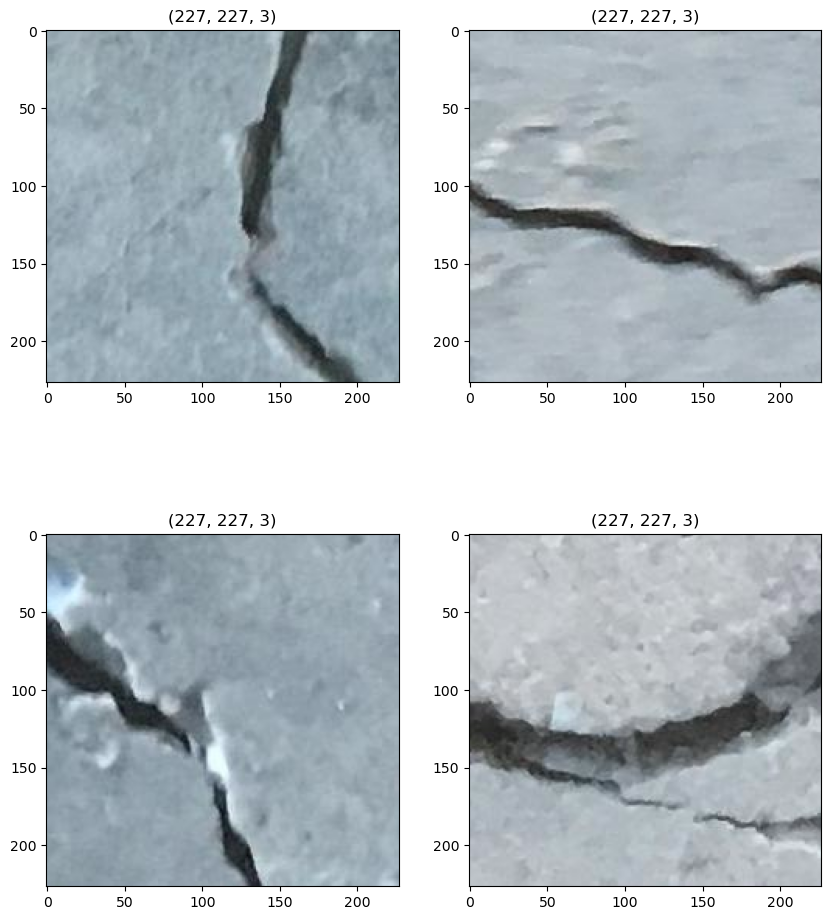

In [9]:
load_images_from_folder("/Users/sandeepreddy/Desktop/Image_detection_CNN/Input_data/Positive")


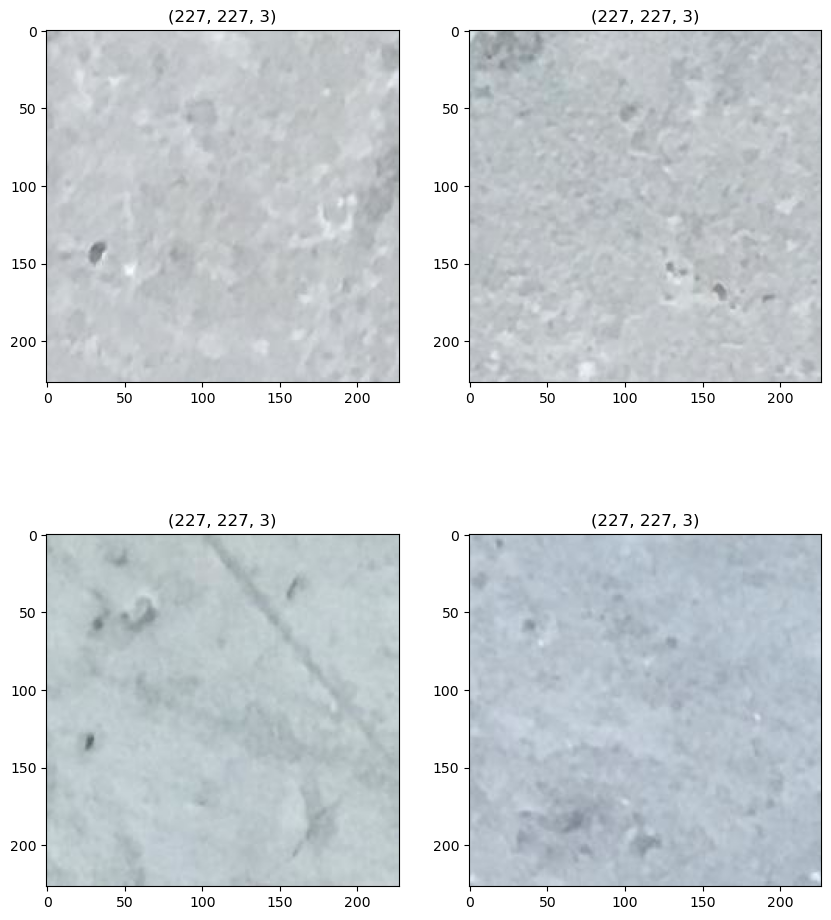

In [10]:
load_images_from_folder("/Users/sandeepreddy/Desktop/Image_detection_CNN/Input_data/Negative")


In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.999):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/Users/sandeepreddy/Desktop/Image_detection_CNN/inceptionV3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
     layer.trainable = False

In [15]:
# You can also choose different layer for starting
last_layer = pre_trained_model.get_layer('mixed7') 
last_output = last_layer.output

#Then we add our layers 

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout layer to prevent overfitting
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x)
model.compile(optimizer = tf.keras.optimizers.legacy.RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
    
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0]

 conv2d_11 (Conv2D)          (None, 16, 16, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 16, 16, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 16, 16, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 16, 16, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 16, 16, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 16, 16, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 16, 16, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 16, 16, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 16, 16, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 16, 16, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 7, 7, 384)            995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 7, 7, 192)            147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 7, 7, 192)            172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 7, 7, 192)            172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 7, 7, 192)            147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 7, 7, 192)            576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 7, 7, 768)            0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 7, 7, 192)            147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 7, 7, 192)            215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 7, 7, 192)            215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 7, 7, 160)            0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 7, 7, 160)            0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 7, 7, 768)            0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 7, 7, 192)            576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 7, 7, 192)            576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 7, 7, 192)            0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 7, 7, 192)            0         ['batch_normalization_67[0][0]
          

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory('/Users/sandeepreddy/Desktop/Image_detection_CNN/Input_data/',
                                                     target_size=(150,150),
                                                     batch_size=64,
                                                     shuffle=True,
                                                     class_mode='binary',
                                                     subset='training') 

Found 28000 images belonging to 2 classes.


In [18]:
validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

validation_generator =  validation_datagen.flow_from_directory('/Users/sandeepreddy/Desktop/Image_detection_CNN/Input_data/',
                                                                target_size=(150,150),
                                                                batch_size=64,
                                                                class_mode='binary',
                                                                subset='validation') 

Found 12000 images belonging to 2 classes.


In [19]:
# Taking lot of time.. 
# callbacks = myCallback()

# history = model.fit_generator(train_generator,
#             validation_data = validation_generator,
#             epochs = 7,
#             verbose = 1,
#             callbacks=[callbacks])

Epoch 1/7


/var/folders/2n/w1ry85d92pqdvdsyt_mzvfc00000gn/T/ipykernel_23300/3243089991.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


438/438 [==============================] - 293s 666ms/step - loss: 0.0584 - accuracy: 0.9871 - val_loss: 0.0083 - val_accuracy: 0.9971
Epoch 2/7
438/438 [==============================] - 280s 640ms/step - loss: 0.0210 - accuracy: 0.9954 - val_loss: 0.0110 - val_accuracy: 0.9977
Epoch 3/7
438/438 [==============================] - 283s 646ms/step - loss: 0.0174 - accuracy: 0.9964 - val_loss: 0.0142 - val_accuracy: 0.9972
Epoch 4/7
438/438 [==============================] - 278s 634ms/step - loss: 0.0127 - accuracy: 0.9979 - val_loss: 0.0097 - val_accuracy: 0.9981
Epoch 5/7
438/438 [==============================] - 271s 619ms/step - loss: 0.0086 - accuracy: 0.9983 - val_loss: 0.0112 - val_accuracy: 0.9979
Epoch 6/7
438/438 [==============================] - 278s 634ms/step - loss: 0.0082 - accuracy: 0.9986 - val_loss: 0.0222 - val_accuracy: 0.9965
Epoch 7/7
438/438 [==============================] - 267s 610ms/step - loss: 0.0063 - accuracy: 0.9987 - val_loss: 0.0122 - val_accuracy: 0.

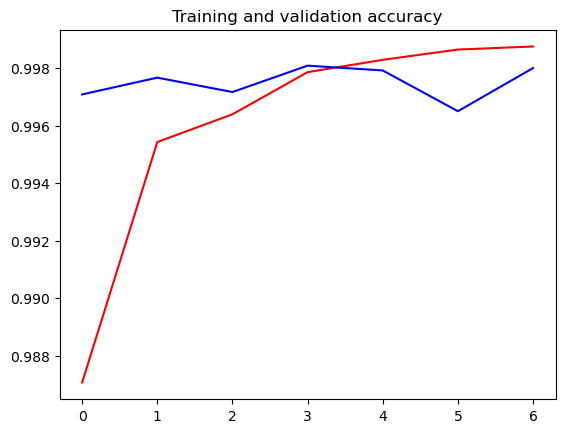

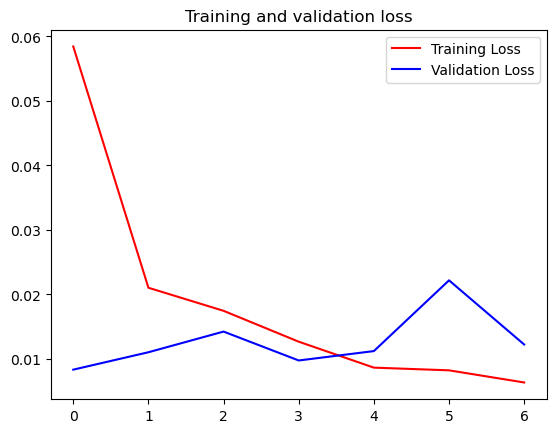

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [22]:
model.save('/Users/sandeepreddy/Desktop/Image_detection_CNN/inceptionV3model.keras')
